In [69]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import pickle
import os.path
from datetime import datetime
import pyarrow
import matplotlib.pyplot as plt
%matplotlib inline

#set ggplot style
plt.style.use('ggplot')

In [70]:
# Dynamic parameters
data_dir  = '../data/' + str(datetime.date(datetime.now()))
agg_file  = 'agg_data_{}.parquet.gzip'.format(datetime.date(datetime.now()))
trend_file  = 'trend_{}.csv'.format(datetime.date(datetime.now()))

print(trend_file)

# import data
agg_df = pd.read_parquet(os.path.join(data_dir, agg_file))
daily_df = pd.read_csv(os.path.join(data_dir, trend_file))

#Create place to save diagrams
image_dir = './images/'
if not os.path.exists(image_dir):
    os.mkdir(image_dir)

trend_2020-02-04.csv


In [71]:
# Convert types
for col in ['confirmed', 'deaths', 'recovered']:
    agg_df[col] = agg_df[col].replace('', 0).astype(int)

# Trend Lines

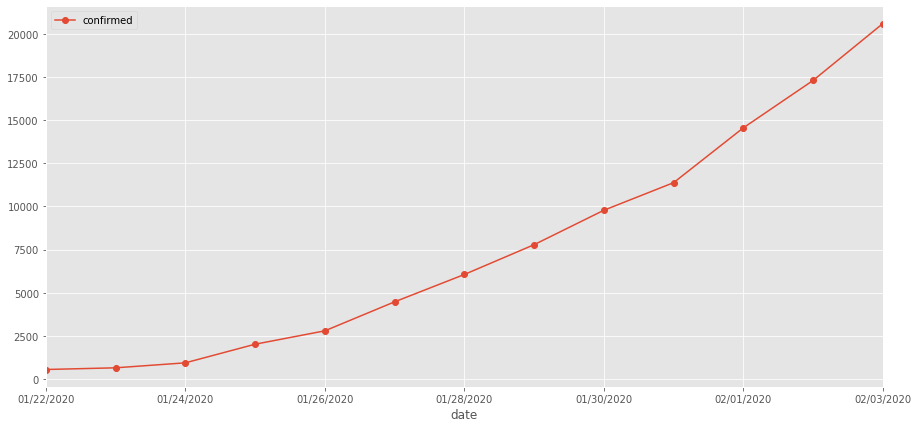

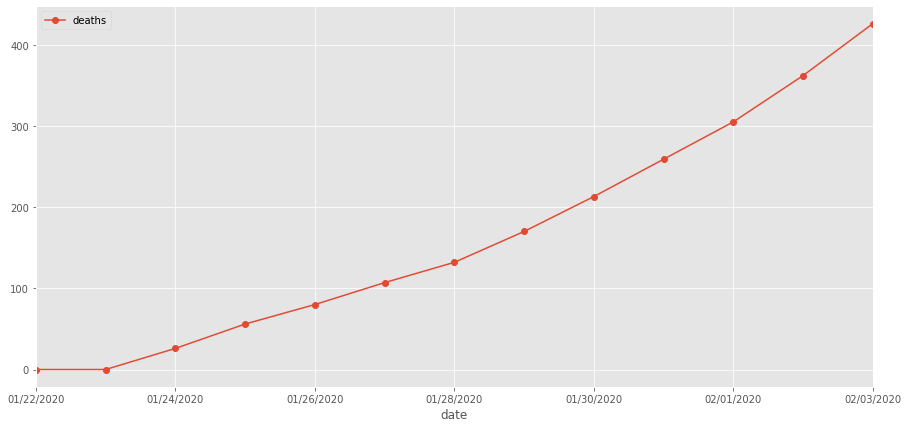

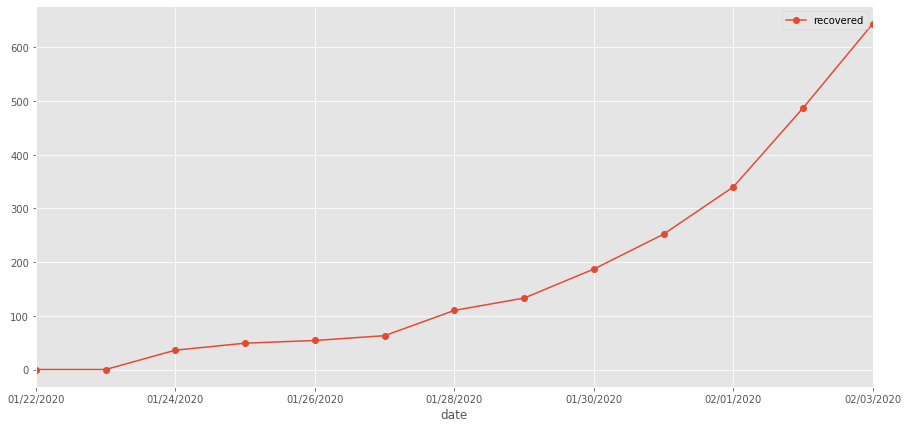

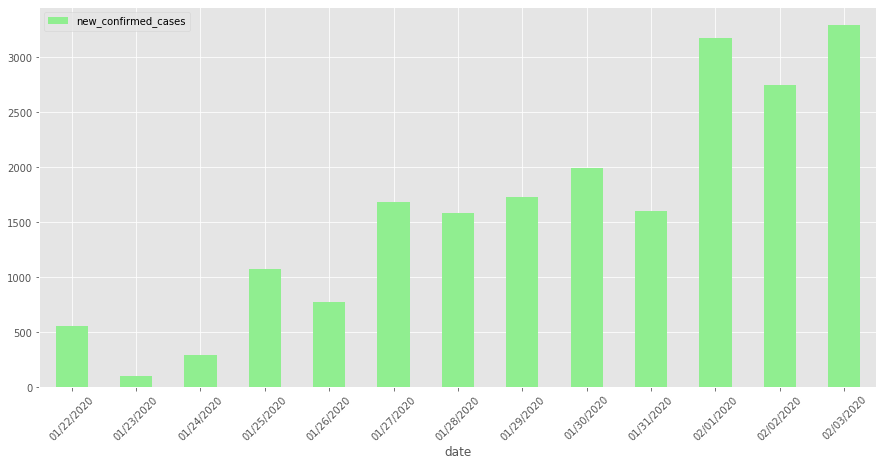

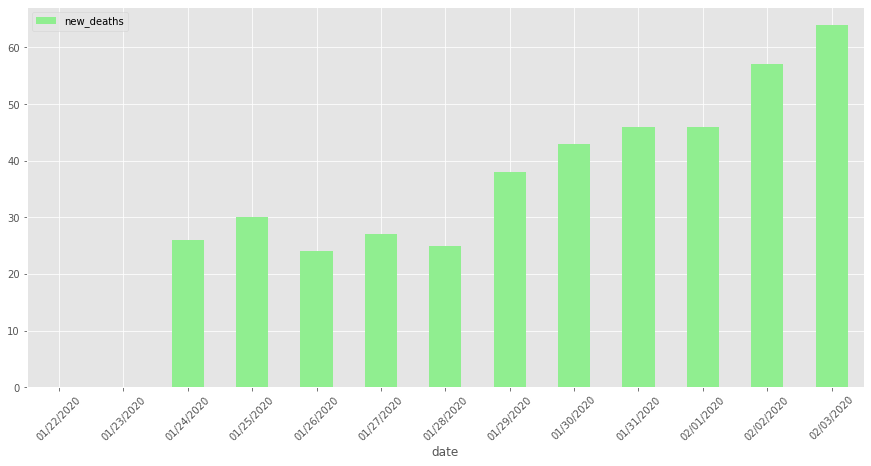

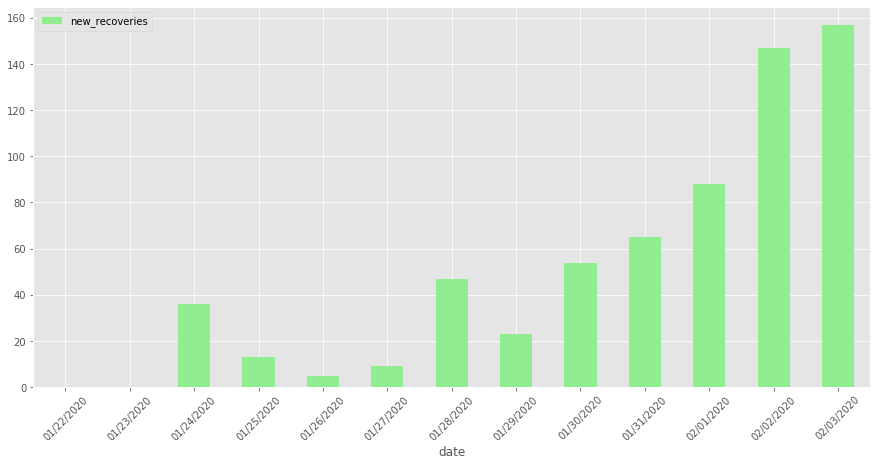

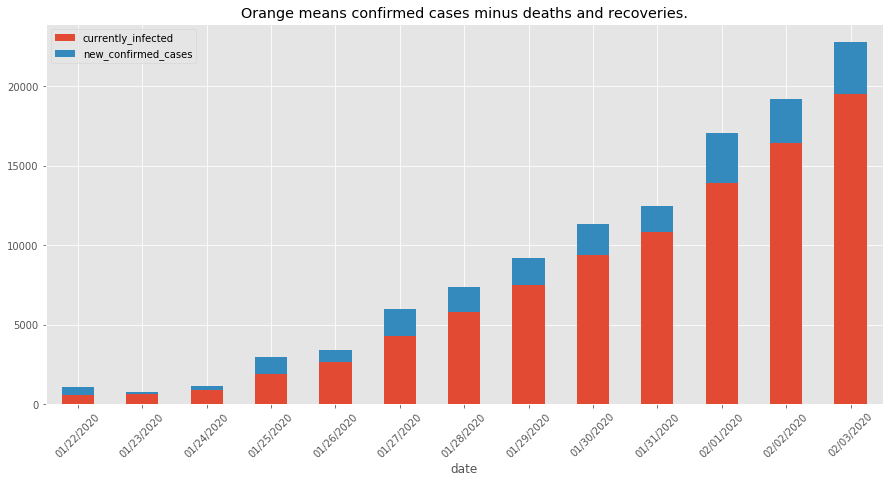

In [102]:

# Plot and save trendline graph
def create_trend_line(tmp_df, col):
    fig, ax = plt.subplots(figsize=(15,7))
    tmp_df.groupby(['date'])[[col]].sum().plot(ax=ax, marker='o')
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, '{}_trendline.jpg'.format(col)))

def create_bar(tmp_df, col):
    fig, ax = plt.subplots(figsize=(15,7))
    tmp = tmp_df.head(30).groupby(['date'])[[col]].sum()
    tmp.plot.bar(ax=ax, rot=45, color='lightgreen')
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, '{}_bar.jpg'.format(col)))
    
    
def create_stacked_bar(tmp_df, col1, col2, fig_title):
    tmp_df = tmp_df.set_index('date')
    fig, ax = plt.subplots(figsize=(15,7))
    tmp_df[[col2, col1]].plot.bar(ax=ax,
                                  rot=45,
                                  stacked=True,
                                  title=fig_title);
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, '{}_stacked_bar.jpg'.format(col2)))
    
# Time Series Data Plots
agg_cols = ['confirmed', 'deaths', 'recovered']
for col in agg_cols:
    create_trend_line(agg_df, col)

# Daily Figures Data Plots
daily_figures_cols = ['new_confirmed_cases', 'new_deaths', 'new_recoveries']
for col in daily_figures_cols:
    create_bar(daily_df, col)
    
create_stacked_bar(daily_df, 'new_confirmed_cases', 'currently_infected', "Orange means confirmed cases minus deaths and recoveries.")

In [91]:
daily_df

,Unnamed: 0,new_confirmed_cases,new_deaths,new_recoveries,date,currently_infected,delta
0,0,555,0,0,01/22/2020,555,0
1,1,98,0,0,01/23/2020,653,0
2,2,288,26,36,01/24/2020,879,-62
3,3,1078,30,13,01/25/2020,1914,-105
4,4,775,24,5,01/26/2020,2660,-134
5,5,1679,27,9,01/27/2020,4303,-170
6,6,1584,25,47,01/28/2020,5815,-242
7,7,1726,38,23,01/29/2020,7480,-303
8,8,1993,43,54,01/30/2020,9376,-400
9,9,1598,46,65,01/31/2020,10863,-511


## Geomapping 

In [12]:
china_df = agg_df[(agg_df.country == 'Mainland China') | (agg_df.country == 'China')]

In [15]:
china_df

,confirmed,country,date,deaths,province,recovered
15,0,China,2020-01-22,0,Inner Mongolia,0
14,4,China,2020-01-22,0,Hunan,0
13,444,China,2020-01-22,0,Hubei,0
12,0,China,2020-01-22,0,Hong Kong,0
11,5,China,2020-01-22,0,Henan,0
...,...,...,...,...,...,...
14,87,Mainland China,2020-01-30,0,Guangxi,2
28,14,Mainland China,2020-01-30,0,Jilin,1
33,1,Mainland China,2020-01-30,0,Tibet,0
31,8,Mainland China,2020-01-30,0,Qinghai,0


In [18]:
# Rename all china values
china_df['country'] = ['China' for x in china_df.country]

/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
china_df

,confirmed,country,date,deaths,province,recovered
15,0,China,2020-01-22,0,Inner Mongolia,0
14,4,China,2020-01-22,0,Hunan,0
13,444,China,2020-01-22,0,Hubei,0
12,0,China,2020-01-22,0,Hong Kong,0
11,5,China,2020-01-22,0,Henan,0
...,...,...,...,...,...,...
14,87,China,2020-01-30,0,Guangxi,2
28,14,China,2020-01-30,0,Jilin,1
33,1,China,2020-01-30,0,Tibet,0
31,8,China,2020-01-30,0,Qinghai,0
